## TP 3 : Sods Shock Tube

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---
Pour ce 3ème travail personnel nous allons nous intéresser au problème du tube à chocs. 

Brièvement, il s'agit d'un tube contenant un gaz et séparé en 2 régions par un diaphragme (une membrane) infiniment mince. Le gaz contenu dans ces deux régions étant initialement à des pressions différentes, la rupture instantanée du diaphragme aura pour conséquence de généré une onde de choc (à 1 dimension dans notre cas) à l'intérieur du tube. 

$\underline{\text{Objectif :}}$ calculer la pression, la densité et la vitesse du gaz compressible au travers du tube à chocs à un instant qui succède la rupture du diaphragme. Pour ce faire, nous utiliserons la méthode de Richtmyer introduite dans la partie théorique de l'énoncé de ce travail personnel. 

Le second objectif de ce travail sera alors de voir si la méthode de Richtmyer tient, ou non, compte du choc créer en $x = 0$ m.

---
##### 1. Rappel & développement théorique:
---
#### 1.1 Les équations d'Euler.
---
Comme annoncé dans l'énoncé du problème, les équations d'Euler gouvernent le mouvement d'un fluide non-visqueux. Par conséquent elles vont nous permettre de décrire l'écoulement à 1 dimension du gaz dans le tube à chocs lorsque le diaphragme est rompu.

Les équations d'Euler sont ainsi constituées des équations suivantes :

$$
\left\{
    \begin{array}{lll}
        &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 & \mbox{(conservation de la masse)}\\
        &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p) = 0 & \mbox{(conservation de $\overline{\mathbf{p}}$)}\\
        &\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)= 0 & \mbox{(conservation de l'énergie)}
    \end{array}
\right.
$$

où 

$$
    \begin{array}{ll}
        \overline{\mathbf{p}} \mbox{, est l'impulsion (la quantité de mouvement)}\\
        e_T = e+u^2/2 \mbox{, est l'énergie totale par unité de masse}\\
        \rho \mbox{, est la densité du fluide}\\
        u \mbox{, est la vitesse du fluide}\\
        p \mbox{, est la pression du fluide}\\
    \end{array}
$$

Les équations d'Euler, sous la forme conservative (fournissant des résultats plus précis), peuvent alors être écrites sous forme vectorielle comme suit :

\begin{equation}
\frac{\partial }{\partial t} \overline{\mathbf{u}} + \frac{\partial }{\partial x} \overline{\mathbf{f}} = 0
\end{equation}

avec $\overline{\mathbf{u}}$ le vecteur des variables conservées et $\overline{\mathbf{f}}$ le vecteur de flux, donnés par :

\begin{align}
\overline{\mathbf{u}} & = 
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]  &  
\overline{\mathbf{f}} & = 
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u \\ 
\end{array} \right]
\end{align}

La manipulation de ces deux vecteurs ne nous posera pas de problème, car nous avons déjà pu nous familiariser avec lors de la 3ème leçon du premier module *Phugoid - Phugoid Full Model*.

Pour la suite, une 4ème équation est nécessaire. Ainsi, en introduisant l'équation d'état qu'est l'équation des gaz parfaits, nous obtenons l'équation pour la pression suivante :

\begin{equation}
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
\end{equation}

où $\gamma^{(1)}$ vaudra dans notre cas $1.4$

En outre, en exprimant la pression en terme du vecteur des variables conservées $\overline{\mathbf{u}}$ :

\begin{align}
\overline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]  
→ p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)
\end{align}

et en remarquant que $\overline{\mathbf{f}}$ est une fonction de $\overline{\mathbf{u}}$ nous avons alors :

$$→ \overline{\mathbf{f}}(\overline{\mathbf{u}}) = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

qui est facilement résolvable.

___
###### [1] : Avec $\gamma =  \frac{c_p}{c_v}$, le rapport de la capacité calorifique à pression constante, $c_p$, par la capacité calorifique à volume constant, $c_v$.

---
#### 1.2 La méthode de Richtmyer.
---
Pour résoudre notre problème nous allons comme annoncé utiliser la méthode de Richtmyer. Cette nouvelle méthode est, comme pour la méthode de MacCormack que nous avons put apprendre dans la leçon 2 (*03-02 Convection Schemes*)de ce module, une méthode en deux étapes à savoir :

\begin{align}
\overline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \overline{\mathbf{u}}^n_{i+1} + \overline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \overline{\mathbf{f}}^n_{i+1} - \overline{\mathbf{f}}^n_i\right) \\
\overline{\mathbf{u}}^{n+1}_i &= \overline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\overline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \overline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}

Où la première de ces deux étapes applique un schéma de Lax-Friedrichs. En outre, cette première étape est comme un *prédicteur* de la solution tandis que la seconde est un *correcteur* qui applique une mise à jour Leapfrog". 

Ainsi, nous voyons clairement comment notre algorithme devra s'articuler. À partir des conditions initiales que l'on aura implémentées, un premier calcul du vecteur flux nous fournira une solution intermédiaire, 

$$\overline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$$

qui servira a son tour au calcul du vecteur flux,

$$\overline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \overline{\mathbf{f}}\left(\overline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)$$

pour le correcteur. On obtiendra ainsi par itération sur le temps, l'évolution de notre système.

Passons sans plus tarder à l'écriture de nos codes.

---
##### 2. Un premier pas vers la résolution du problème du tube à chocs.

---
#### 2.1 Les conditions initiales (CI).

---

Comme à notre habitude, commençons par importer les librairies qui nous seront utiles pour la suite.

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Il convient ensuite d'initialiser la discrétisation spatiale ainsi que l'ensemble des conditions initiales suivantes :

$$→ \underline{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$→ \underline{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$

où $IC_L$ et $IC_R$ sont, respectivement, les conditions initiales à gauche et à droite de la membrane ($\underline{I}$nitial $\underline{C}$ondition at $\underline{L}$eft & $\underline{I}$nitial $\underline{C}$ondition at $\underline{R}$ight en anglais).

Remarque : les pressions utilisées sont exprimées en N plutôt que laissées en kN.

In [2]:
# On définit notre grille spatiale
nx = 81
x = numpy.linspace(-10,10,nx)

# Conditions initiales à gauche de la membrane
rho_L = 1
u_L   = 0
p_L   = 100000

# Conditions initiale à droite de la membrane
rho_R = .125
u_R   = 0
p_R   = 10000

Nous devons maintenant implémenter ces conditions initiales (CI) à notre système. Pour cela, nous nous inspirons de ce qui a été fait dans la leçon *3.1 Conservation Law* (entre autre) pour la fonction *rho_green_light*.

Nous créons ainsi 3 listes : une première pour nos valeurs de densité, une seconde pour celles de la vitesse et une dernière pour les pressions. Par le biais de ces listes, nos CI seront implémentées en fonction de la position dans le tube.

Enfin, il convient ensuite de distinguer la gauche de la droite du tube. En plaçant l'origine de notre axe x au milieux du tube nous avons immédiatemment que :

$$
x \in \left\{ 
    \begin{array}{}
         & [-10,0[ \mbox{ m} & → & nx\in[0,39]\\
         & [0,10[ \mbox{ m} & → & nx\in[40,80]
    \end{array}
\right.
$$

Ce qui nous donne bien 40 valeurs à gauche (le 0 étant également un point de notre grille d'espace) et 40 valeurs à droite.

Passons maintenant au codage de tout ceci.

In [3]:
x1 = numpy.ones(nx)
    
u1 = x1*rho_L                  # densité à gauche de la membrane
u1[int((nx-1)/2):] = rho_R     # densité à droite de la membrane

u2 = x1*u_L                    # vitesse à gauche de la membrane
u2[int((nx-1)/2):] = u_R       # vitesse à droite de la membrane

u3 = x1*p_L                    # pression à gauche de la membrane
u3[int((nx-1)/2):] = p_R       # pression à droite de la membrane

Nous pouvons alors réaliser un graphique de chacune de ces conditions initiales afin de vérifier qu'elles aient été correctement implémentées.

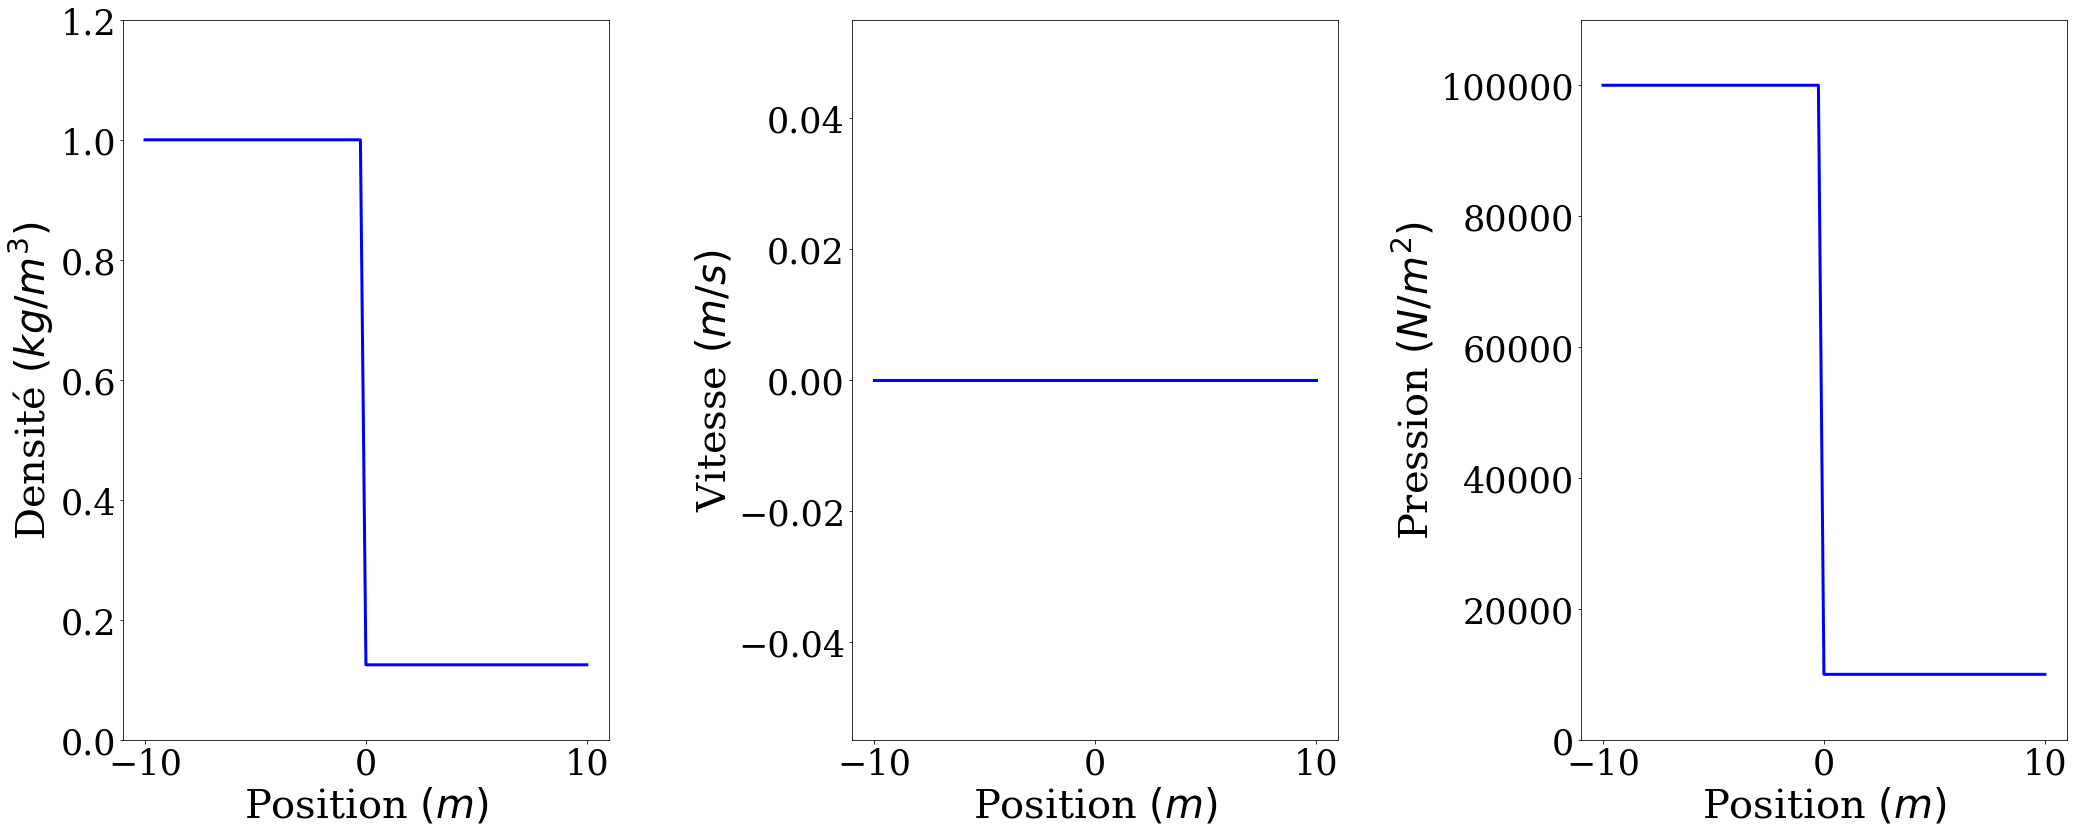

In [4]:
figure = pyplot.figure(figsize = (30, 25))
figure.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5)

pyplot.subplot(1, 3, 1)
pyplot.plot(x, u1, 'b-', lw=3)
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=40)
pyplot.ylim(0,1.2)
pyplot.xlabel('Position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 2)
pyplot.plot(x, u2, 'b-', lw=3)
pyplot.ylabel('Vitesse $(m/s)$',fontsize=40)
pyplot.xlabel('Position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 3)
pyplot.plot(x, u3, 'b-', lw=3)
pyplot.ylabel('Pression $(N/m^{2})$',fontsize=40)
pyplot.ylim(0,110000)
pyplot.xlabel('Position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

D'où nous pouvons voir assez agréablement que nos conditions initiales ont été correctement implémentées. 

Pour la suite de la résolution de ce problème, nous allons définir deux fonctions.

___
#### 2.2 Introduction de nouvelles fonctions.

---

* La première de ces deux fonctions, la fonction $flux()$, va nous permettre de calculer le vecteur flux introduit dans le rappel théorique. Pour la réaliser, nous allons reprendre la même idée que celle utilisée lors de la leçons 3 du module 1 *Phugoid Full Model*, e.g. une fonction qui recoit différente variables, ici les trois composantes de taille nx du vecteur des variables conservées $\overline{\mathbf{u}}$, et qui retourne directement le resultat du calcul des trois composantes, également de taille nx, du vecteur flux. 

* La seconde fonction que nous allons définir est celle qui va reprendre la méthode de Richtmyer. Notons tout d'abord que l'écriture de la méthode de Richtmyer sous la forme d'une fonction n'est pas essentielle pour ce tp  étant donné que nous n'allons l'appeler qu'à une seule reprise pour la résolution du problème. Toutefois, comme il nous l'a été suggéré au cours des leçons de ce module, l'écriture d'une telle méthode sous la forme d'une fonction est un bon exercice en plus de pouvoir s'avérer utile pour une potentielle future réutilisation.

Détaillons quelque peu cette deuxième fonction.

→ Dans un premier temps, nous donnons comme variables d'entrées le tableau de nos conditions initiales u, un temps de 
simulation (t_sim), un pas de temps (dt) et le pas d'espace (dx).

→ dans un second temps, nous calculons le nombre de point de la grille de temps (nt), et définissons 2 tableaux dont nous allons avoir besoin pour la résolution par la méthode de Richtmyer.

* Le premier tableau, *u_n* est un tableau qui contiendra l'ensemble de nos solutions à tout temps et pour tout x. Dès lors, nous aurons à créer un tableau (une sorte de grosse matrice) de nt lignes et de 3 colonnes (e.g. une pour chacune des composantes du vecteur des variables conservées $\overline{\mathbf{u}}$) chacune de taille nx comme représenté sur la figure 1 ci-dessous. Pour se faire, nous allons utilisé la même idée que celle utilisée dans le travail personnel précédent (* Traffic Flow *). C'est-à-dire créer une boucle for pour les itérations sur le temps dans laquelle sera repris l'algorithme de la méthode Richtmyer et où, à la différence de ce qui a été fait précédemment, nous aurons besoin d'un indice supplémentaire pour différencier la colonne de la taille de celle-ci. Finalement, nous aurons également à spécifier que la première ligne de ce nouveau tableau n'est autre que celle constituée par nos conditions initiales.

![Image](./figures/matrice.png)

###### Figure 1. Représentation du tableau des solutions calculées par la méthode de Richtmyer. 
---

* Le second tableau que nous auront à définir, *u_star*, sera de dimensions identiques à u et servira d'étape intermédiaire pour la méthode de Richtmyer. Il contiendra donc l'ensemble des valeurs calculées par le prédicteur qui serviront au correcteur pour le calcul de la solution à la nt-ième itération. 

→ Ensuite, il nous faut fixer nos conditions aux bords (dans la boucle for afin qu'elles le soient à chaque itération de temps) qui ne sont autre que l'état initial de notre système en ces points. La raison de ces conditions aux bords vient du fait que l'on étudie notre système sur un temps relativement court ($t = 0,01s$) et qu'à priori, le gaz n'a pas suffisamment voyagé que pour atteindre les bords.

→ Finalement, on demande à notre fonction de nous ressortir les valeurs de nos variables pour la nt-ème étape.

Voici donc nos deux fonctions avec tout d'abord la fonction $flux()$ :

In [5]:
def flux(u):
    
    """Calcul du vecteur flux
    
    Paramètres
    ----------
    u[0]  : tableau de floats
        rho
    u[1]  : tableaux de floats
        rho*u
    u[2]  : tableau de floats
        rho*e_T
        
    Returns
    -------
        F : tableau
        tableau avec le vecteur flux pour tout point x
    """
    
    return numpy.array([u[1,:],
        (u[1,:]**2/u[0,:])+((gamma-1)*(u[2,:]-(.5*(u[1,:]**2/u[0,:])))),
        (u[2,:]+((gamma-1)*(u[2,:]-.5*(u[1,:]**2/u[0,:]))))*(u[1,:]/u[0,:])])

Suivi de la fonction Richtmyer qui implémente tout ce dont nous venons d'évoquer.

In [6]:
def Richtmyer(u, t_sim, dt, dx):
    
    """ Calcul la solution du problème du tube à choc par la méthode de Richtmyer
    
    Paramètres
    ----------
    u     : tableau de float
            rho, rho*u et rho*e_T
    nt     : int
            Nombre de pas de temps
    dt     : float
            Taille des pas de temps
    dx     : float
            réseau d'espace
    
    Returns
    -------
    u_n : tableau de floats
            rho, rho*u, rho*e_T après nt pas de temps à chaque point x
    """
    
    # On initialise notre grille de temps
    nt= int(t_sim/dt)+1
    
    # On définit les tableaux dont nous aurons besoin pour la résolution
    # où len(u) donne le nombre d'élément de u = nombre de colonne de u_n
    u_n = numpy.zeros((nt,len(u),nx))    # On définit un tableau via 3 indices
    u_n[:,:,:nx] = u.copy()              
    u_star = numpy.empty_like(u)
    u_star = u.copy()
    
    # On calcul nos solutions par la méthode de Richtmyer pour tout temps
    for t in range(1,nt):
        F = flux(u)
        u_star[:,1:] = .5 * (u[:,1:]+u[:,:-1] - dt/dx * (F[:,1:] - F[:,:-1]))
        Fstar = flux(u_star)
        u_n[t,:,:-1] = u[:,:-1] - dt/dx * (Fstar[:,1:]-Fstar[:,:-1])
        
        # On impose nos conditions aux bords du tube et on redéfinit nos "CI"
        u[:,0]  = u_n[0,:,0]
        u[:,-1] = u_n[0,:,-1]
        u = u_n[t,:,:].copy()

    return numpy.array([u_n[nt-1,0,:],u_n[nt-1,1,:],u_n[nt-1,2,:]])

---
##### 3. Résolution du problème du tube à choc :

---

Dans la section précédente, nous avons posé l'ensemble des conditions initiales pour notre sytème, mais si nous regardons nos équations (et nos fonctions) d'un peu plus prêt, nous remarquons que les composantes de $\overline{\mathbf{u}}$ ne sont pas nos conditions initiales mais une combinaison de celles-ci. Dès lors il nous suffit de modifier quelque peu les expressions qui implémentent les composantes de $\overline{\mathbf{u}}$ tout en conservant leur forme car nous savons, et nous avons pu le vérifier au moyen de graphiques, que l'implémentation nous donnera le résultat escompté.

Nous avons ainsi :

$$
    \begin{array}{ll}
        → & u1 & = \rho \\
        → & u2 & = \rho u
    \end{array}
$$

Pour u3, il suffit ici de partir de l'expression de la pression introduite dans le rappel, à savoir :

\begin{equation}
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
\end{equation}

or pour nos conditions initiales, donc en $t = 0s$, nous avons immédiatement que :

\begin{equation}
p = (\gamma -1)\left(\rho e_T \right)
\end{equation}

puisque

\begin{equation}
u(t=0) = 0 \mbox{ m/s}
\end{equation}

par conséquent :

\begin{equation}
→ u3 = \rho e_{T}(t=0) = \frac {P(t=0)}{(\gamma-1)}
\end{equation}

Ce qui nous donne en résumé :

$$
→ \left\{
    \begin{array}{}
        u1 = \rho \\
        u2 = \rho u \\
        u3 = \frac{P}{\gamma - 1}
    \end{array}
\right.
$$

Passons sans plus tarder à l'implémentation de tout ceci.

In [7]:
# On initialise le temps de la simulation et le facteur gamma
t_sim = .01
gamma = 1.4

# Ainsi qu les pas de temps et d'espace
dx = .25
dt = .0002

# On initialise un tableau qui servira à l'implémentation des CI
x1 = numpy.ones(nx)
    
u1 = x1*rho_L                        # densité à gauche de la membrane
u1[int((nx-1)/2):] = rho_R           # densité à droite de la membrane

u2 = x1*rho_L*u_L                    # vitesse*densité à gauche de la membrane
u2[int((nx-1)/2):] = rho_R*u_R       # vitesse*densité à droite de la membrane

u3 = x1*p_L/(gamma-1)                # densité*énergie totale à gauche de la membrane
u3[int((nx-1)/2):] = p_R/(gamma-1)   # densité*énergie totale à droite de la membrane

# On initialise notre vecteur des variables conservés avec pour composante u1, u2 et u3
u = numpy.empty((3,nx))
u = numpy.array([u1,u2,u3])

Il suffit maintenant d'appeler notre fonction Richtmyer et d'effectuer, avec les résultats obtenu par cette dernière, l'opération inverse à ce qui a été fait avec nos CI pour obtenir les valeurs de densités, vitesses et de pressions du gaz à $t = 0.01s$.

In [8]:
# On appel notre fonction pour résoudre le problème du tube à choc
un=Richtmyer(u, t_sim, dt, dx)

# On récupère les valeurs de densité, pression et vitesse recherchées.
rho = un[0]                # Densités de la nt-ème étape de temps pour tout x
v   = un[1]/un[0]          # Vitesses de la nt-ème étape de temps pour tout x
p   = (gamma-1)*(un[2]-.5*un[1]**2/un[0])   # Pressions de la nt-ème étape de temps pour tout x

Et nous pouvons finalement obtenir les résultats recherchés pour $t = 0.01s$ en $x = 2.5m$ en se souvenant que l'origine se situe au milieu du tuyau donc à $10m$ du bord gauche du tuyau.

Remarque : Comme à notre habitude, nous sortons l'ensemble des résultats avec seulement 2 décimales au moyen de la fonction proposé par numpy : $round()$.

In [9]:
# On récupère l'indice de position correspondant à x=2.5m soit à 12.5m du bord gauche 
L = 12.5           # en m
indx = int(L/dx)

# On ressort les résultats désiré pour l'indice spatiale correspondant
print("")
print("→ Densité en x = 2.5m à l'instant t = 0.01s :",round(rho[indx],2),"kg/m^3")
print("")
print("→ Vitesse en x = 2.5m à l'instant t = 0.01s :",round(v[indx],2),"m/s")
print("")
print("→ Pression en x = 2.5m à l'instant t = 0.01s :",round(p[indx],2),"N/m^2")


→ Densité en x = 2.5m à l'instant t = 0.01s : 0.37 kg/m^3

→ Vitesse en x = 2.5m à l'instant t = 0.01s : 292.61 m/s

→ Pression en x = 2.5m à l'instant t = 0.01s : 30250.89 N/m^2


Qui, après vérification sur le site :
http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about
, s'avèrent être les résultats exactes (vis à vis des valeurs renseignées).

---
#####  4. Analyse des résultats.

---

#### 4.1 Une première analyse.
---
Afin d'analyser l'ensemble de nos résultats commençons par réaliser les graphiques de nos valeurs de densités, vitesses et pressions à $0.01s$ et ce pour tout $x$.

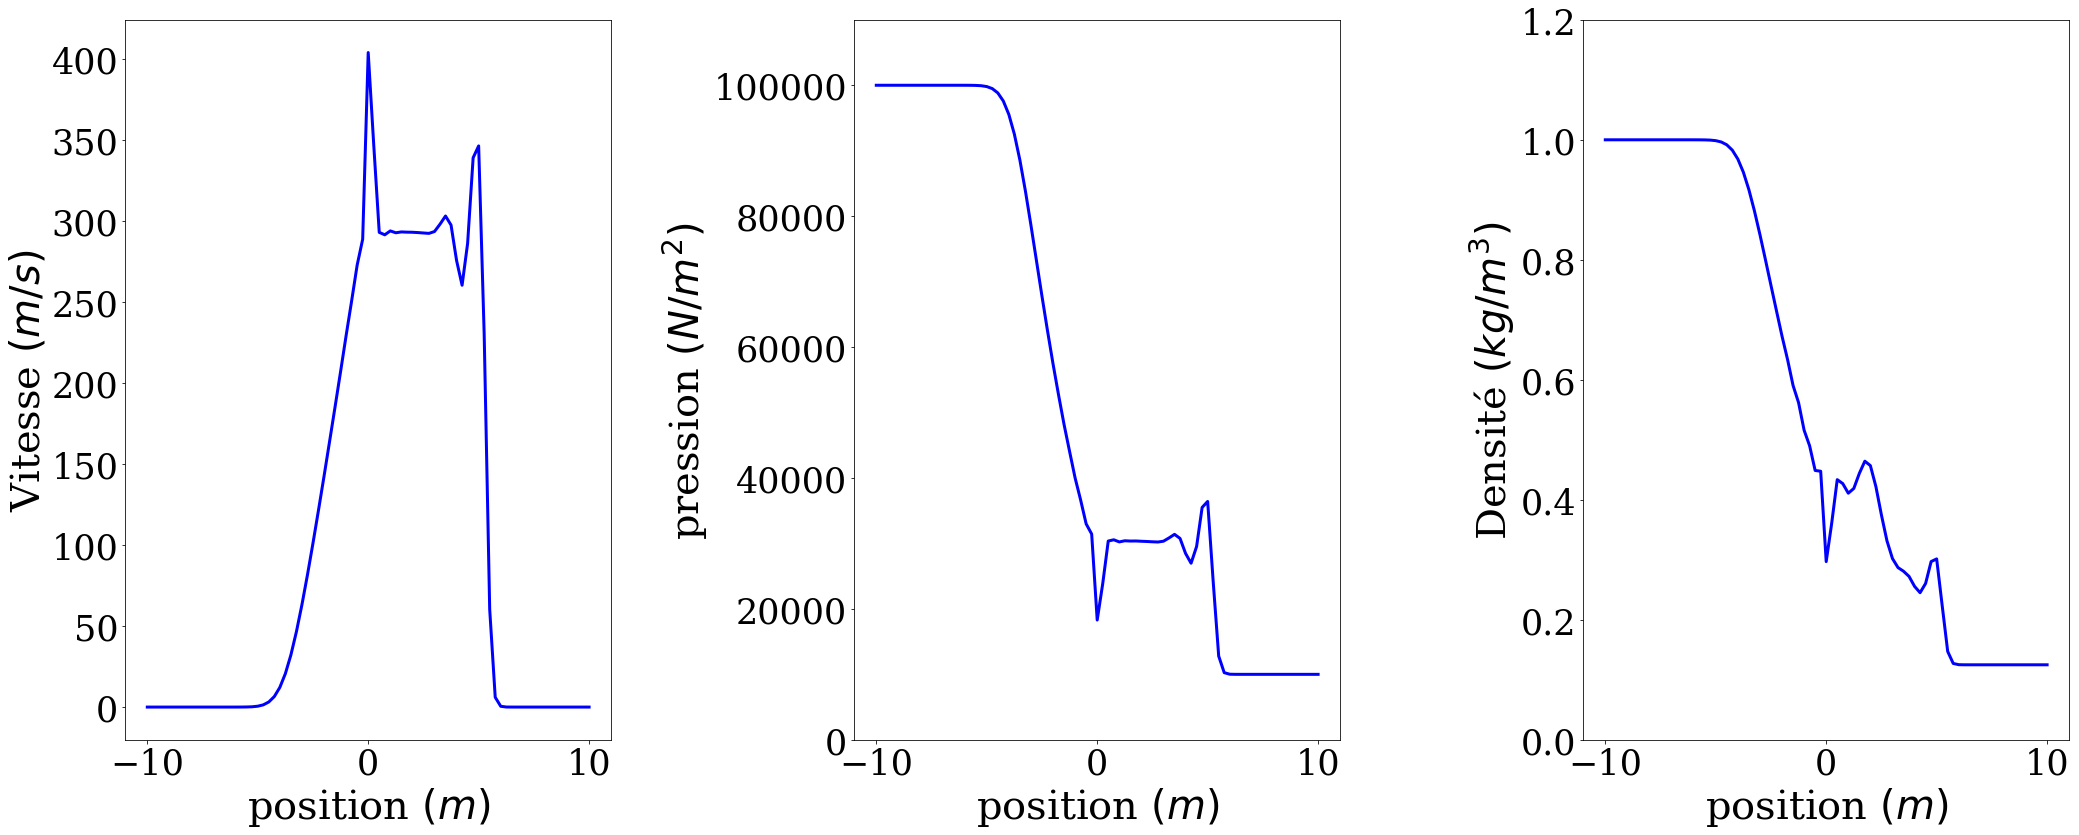

In [10]:
figure = pyplot.figure(figsize = (30, 25))
figure.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5)

pyplot.subplot(1, 3, 1)
pyplot.plot(x, v, 'b-', lw=3)
pyplot.ylabel('Vitesse $(m/s)$',fontsize=40)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 2)
pyplot.plot(x, p, 'b-', lw=3)
pyplot.ylabel('pression $(N/m^{2})$',fontsize=40)
pyplot.ylim(0,110000)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 3)
pyplot.plot(x, rho, 'b-', lw=3)
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=40)
pyplot.ylim(0,1.2)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

Nous désirons à présent comparer nos résultats aux solutions exactes. Pour se faire, à défaut d'avoir l'expression exacte de la solution qui nous aurait permis de réaliser une comparaison immédiate, nous allons nous servir des graphiques des solutions exactes fournit dans l'énnoncé de l'exercice et repris ci-dessous.

![shock_analytic](./figures/shock_tube_.01.png)

---
###### figure 2. "Analytical solution for Sod's first test".
###### source : Leçon 5 du 3e module  *Sods shock tube*.
---

Passons maintenant à l'analyse.

On constate à première vue que l'ensemble de nos graphiques correspondent avec les solutions analytiques. En effet, des palliers de pression sembles apparaitrent "aux mêmes valeurs" tout comme ceux de la vitesse et de la densité.

De plus, du point de vue physique, les résultats que nous observons nous semble tout à fait cohérents. Effectivement, si nous commençons par regarder la vitesse, nulle initialement, nous constatons une valeur non-nulle de part et d'autre de la membrane. De plus, l'augmentation la plus marquée de la vitesse est comme on peut l'attendre, du côté droit du tube et ce car, la pression et la densité étant initialement plus faibles du côté droit, l'équilibre de ces deux dernières doit s'effectuer de gauche à droite ce qui s'apparente à une propagation d'orientation positive.

Ainsi, comme nous venons de l'évoquer, nous observons ici une situation qui pourrait correspondre à un équilibre de pression et de densité.

Malgré toutes ces similitudes, nous constatons des différences notables, e.g. des pics majeurs en $x = 0m$ ainsi que d'autres pics "plus petits". 

→ Le pic en $x = 0m$ pourrait-être dû au choc créé initialement par la rupture de la membrane en cette position. Nous voyons donc ici que la méthode de Richtmyer tient bien compte de ce chocs dans la résolution du problème.

→ Les pics "plus petits" sembles quant à eux être dû à des oscillations numériques avec des pics un peu plus important en chaque fin de pallier qui appuyent d'autant plus cette idée.

Une étude de la stabilité, que nous ne ferons pas ici, pourrait toutefois nous aider à comprendre ces oscillations.

À présent, afin de pouvoir pousser l'analyse des résultats un peu plus loin, nous pouvons réaliser une animation pour chacune de nos trois variables.

---
#### 4.2 Bonus - Une seconde analyse par animations:

---

Commençons par importer les librairie nécessaire à la réalisation de nos animations.

In [11]:
from matplotlib import animation
from IPython.display import HTML

Nous définissons alors une fonction qui initialisera nos axes.

In [12]:
def animate(data):
    x = numpy.linspace(-10,10,nx)
    y = data
    line.set_data(x,y)
    return line,

Et nous redéfinissons quelque peu notre fonction Richtmyer en lui demandant de retourner dans un tableau de 3 composantes (une composante par variable), l'ensembles des valeurs de pressions, de densité et de vitesse et ce pour tout temps et positions !

In [13]:
def Richtmyer_anim(u, t_sim, dt, dx):
    
    """ Calcul la solution du problème du tube à choc par la méthode de Richtmyer
    
    Paramètres
    ----------
    u     : tableau de float
            rho, rho*u et rho*e_T
    nt     : int
            Nombre de pas de temps
    dt     : float
            Taille des pas de temps
    dx     : float
            réseau d'espace
    
    Returns
    -------
    u_n : tableau de floats
            rho, rho*u, rho*e_T après nt pas de temps à chaque point x
    """
    
    # On initialise notre grille de temps
    nt= int(t_sim/dt)+1
    
    # On définit les tableaux dont nous aurons besoin pour la résolution
    # où len(u) donne le nombre d'élément de u = nombre de colonne de u_n
    u_n = numpy.zeros((nt,len(u),nx))    # On définit un tableau via 3 indices
    u_n[:,:,:nx] = u.copy()              
    u_star = numpy.empty_like(u)
    u_star = u.copy()
    
    # On calcul nos solutions par la méthode de Richtmyer pour tout temps
    for t in range(1,nt):
        F = flux(u)
        u_star[:,1:] = .5 * (u[:,1:]+u[:,:-1] - dt/dx * (F[:,1:] - F[:,:-1]))
        Fstar = flux(u_star)
        u_n[t,:,:-1] = u[:,:-1] - dt/dx * (Fstar[:,1:]-Fstar[:,:-1])
        
        # On impose nos conditions aux bords du tube et on redéfinit nos "CI"
        u[:,0]  = u_n[0,:,0]
        u[:,-1] = u_n[0,:,-1]
        u = u_n[t,:,:].copy()
    
    return numpy.array([u_n[:,0,:], u_n[:,1,:]/u_n[:,0,:], (u_n[:,2,:]-.5*(u_n[:,1,:]**2/u_n[:,0,:]))*(gamma-1)/1000])

Nous appelons ensuite notre fonction.

In [14]:
u_anim = Richtmyer_anim(u, t_sim, dt, dx)

Et nous réalisons les animations comme à notre habitude.

---
#### 4.2.1 Animation de la densité:

---

In [15]:
fig = pyplot.figure(figsize=(7,5));
ax = pyplot.axes(xlim=(-10,10),ylim=(0,1.2),xlabel=('Position (m)'),ylabel=('Densité (kg/m^3)'));
line, = ax.plot([],[],'b-', lw=2);
pyplot.tight_layout()
pyplot.close()

anim = animation.FuncAnimation(fig, animate, frames=u_anim[0], interval=50)
HTML(anim.to_html5_video())

Sur cette première animation, nous pouvons voir l'évolution de la densité de notre système, ce que nous n'avions pas pu visualiser auparavant. Ainsi, comme nous nous y attendions, la densité tend à s'uniformiser dans le tube par l'écoullement du gaz dans la partie droite de ce dernier.

---

#### 4.2.2 Animation de la vitesse:
---

In [16]:
fig = pyplot.figure(figsize=(7,5));
ax = pyplot.axes(xlim=(-10,10),ylim=(0,550),xlabel=('Position (m)'),ylabel=('Vitesse (m/s)'));
line, = ax.plot([],[],'b-', lw=2);
pyplot.tight_layout()
pyplot.close()

anim = animation.FuncAnimation(fig, animate, frames=u_anim[1], interval=50)
HTML(anim.to_html5_video())

Nous observons au début de l'animation, un fort accroissement de la vitesse en $x=0 m$ ce qui correspond à l'endroit où la membrane se rompt. Les particules de gaz se mettent progressivement en mouvement vers la zone moins riche. De plus, on remarque que l'oscillation numérique est présente dès les premiers instant après la rupture de la membrane et semble se propage à proximité du front d'onde uniquement. 

---

#### 4.2.3 Animation de la pression:
---

In [17]:
fig = pyplot.figure(figsize=(7,5));
ax = pyplot.axes(xlim=(-10,10),ylim=(0,110),xlabel=('Position (m)'),ylabel=('Pression (kN/m^2)'));
line, = ax.plot([],[],'b-', lw=2);
pyplot.tight_layout()
pyplot.close()

anim = animation.FuncAnimation(fig, animate, frames=u_anim[2], interval=50)
HTML(anim.to_html5_video())

Tout comme pour la densité, nous constatons ici que la pression tend à s'uniformiser dans le tube.

---
##### 5. Conclusions:

---

Dans ce 3ème travail personnel, nous avons résolu le problème du tube à choc au moyen de la méthode de Richtmyer. Cette nouvelle méthode de résolution numérique nous a permis de résoudre le système d'équations couplées que constituaient les équations d'Euler et l'équation d'état pour les gaz parfait.

La résolution même de ce problème nous a permis de gérer des tableaux plus complexes faisant appel à "3 indices" tout en réutilisant des notions vues au cours du premier module à savoir la manipulation de vecteur.
    
D'autre part, l'analyse de nos résultats ne nous a pas permis de trouver l'origine des "oscillations numériques" visibles sur nos graphiques. Une études de la stabilité voir l'utilisation d'autre méthode de résolution auraient pu nous fournir une piste quant à l'explication de ce phénomène. 

---
##### 6. Sources:

---

[1] Cours de PHYS-F-201, 3e édition (2014-2015), *physique général III - Première partie : thermodynamique*, présenté par M. Nicolas Chamel.

---

###### The cell below loads the style of the notebook.

In [18]:
from IPython.core.display import HTML
css_file = 'styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())